In [1]:
import cv2
import numpy as np
import ffmpeg
import torch
import matplotlib.pyplot as plt

from eve import EVE
from EVE.src.datasources.eve_sequences import EVESequencesBase

In [105]:
eve = EVE()
dataset = EVESequencesBase(
    'sample/eve_dataset',
    participants_to_use=['train01']
)
dataloader = torch.utils.data.DataLoader(dataset)

In [108]:
%%time
inp = next(iter(dataloader))
out = eve(inp)

CPU times: user 2.61 s, sys: 2.23 s, total: 4.84 s
Wall time: 9.32 s


In [112]:
# todo check which of those keys below are required
# there is 30 values, one for each of the frames
# also gotta check if this is going to work with 30hz and 60hz

inp.keys()

dict_keys(['camera_matrix', 'camera_transformation', 'face_R', 'face_R_validity', 'face_W', 'face_W_validity', 'face_h', 'face_h_validity', 'face_o', 'face_o_validity', 'facial_landmarks', 'facial_landmarks_validity', 'head_rvec', 'head_rvec_validity', 'head_tvec', 'head_tvec_validity', 'inv_camera_transformation', 'left_R', 'left_R_validity', 'left_W', 'left_W_validity', 'left_h', 'left_h_validity', 'left_o', 'left_o_validity', 'millimeters_per_pixel', 'pixels_per_millimeter', 'right_R', 'right_R_validity', 'right_W', 'right_W_validity', 'right_h', 'right_h_validity', 'right_o', 'right_o_validity', 'head_R', 'timestamps', 'left_eye_patch', 'right_eye_patch', 'screen_timestamps', 'screen_frame', 'participant', 'subfolder', 'camera', 'left_kappa_fake', 'right_kappa_fake', 'o', 'o_validity'])

In [113]:
inp['pixels_per_millimeter'][0][0]  # those each are the same

tensor([3.4720, 3.4727])

In [82]:
inp['millimeters_per_pixel'][0][0]  # the same

tensor([0.2880, 0.2880])

In [114]:
inp['face_o'][0][:3]  # those each are different

tensor([[ -8.8352, -60.9810, 660.5889],
        [ -8.5575, -61.4053, 663.1761],
        [ -8.7053, -62.0922, 665.7507]])

In [115]:
inp['head_tvec_validity'][0]  # the same

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True])

In [116]:
inp['head_R'][0][0]  # each of those is the same

tensor([[ 0.9995,  0.0270, -0.0140],
        [-0.0178,  0.8929,  0.4499],
        [ 0.0247, -0.4494,  0.8930]])

In [117]:
inp['camera_matrix'][0][0]  # those are also the same

tensor([[1.7806e+03, 0.0000e+00, 9.5933e+02],
        [0.0000e+00, 1.7799e+03, 5.7931e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [118]:
inp['camera_transformation'][0][0]  # those are also the same

tensor([[-9.9982e-01,  1.3867e-02,  1.2878e-02,  2.6548e+02],
        [ 8.8855e-03,  9.4480e-01, -3.2753e-01, -4.2145e+02],
        [-1.6709e-02, -3.2736e-01, -9.4475e-01,  1.4902e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [119]:
inp['face_R_validity'].shape

torch.Size([1, 30])

In [120]:
frame = inp['screen_frame']

In [121]:
frame.numpy().squeeze().transpose().shape

(128, 72, 3, 30)

In [127]:
one = frame.numpy().squeeze().transpose(0, 3, 2, 1)[0]

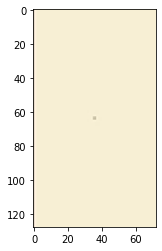

In [130]:
plt.imshow(one.astype(int))

In [131]:
one.shape

(128, 72, 3)

In [134]:
one_hd = cv2.resize(one.astype(float), dsize=(1080, 1920))

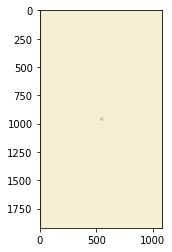

In [135]:
plt.imshow(one_hd.astype(int))